In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

import torch
from vqvaes.models import load_vqvae
from vqvaes.results import TrainingResults
from vqvaes.evals import evaluate_vqvae_recon, interpolate_images_vqvae
from data.nouns import make_datasets
import matplotlib.pyplot as plt
import random

/home/ubuntu/.cache/pypoetry/virtualenvs/vqvaes-Y5Ctg_tt-py3.10/lib/python3.10/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/ubuntu/.cache/pypoetry/virtualenvs/vqvaes-Y5Ctg_tt-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
save_dir = "../checkpoints/vqvae"
train_results = TrainingResults(save_dir)

# Training Results
- `Loss`: Reconstruction Loss + Codebook Loss + Commitment Loss
- `Perplexity`: Measures codebook usage, a high perplexity = a larger number of discrete codes are used by the VQVAE
- `Reconstruction Loss`: MSE over original and reconstructed image

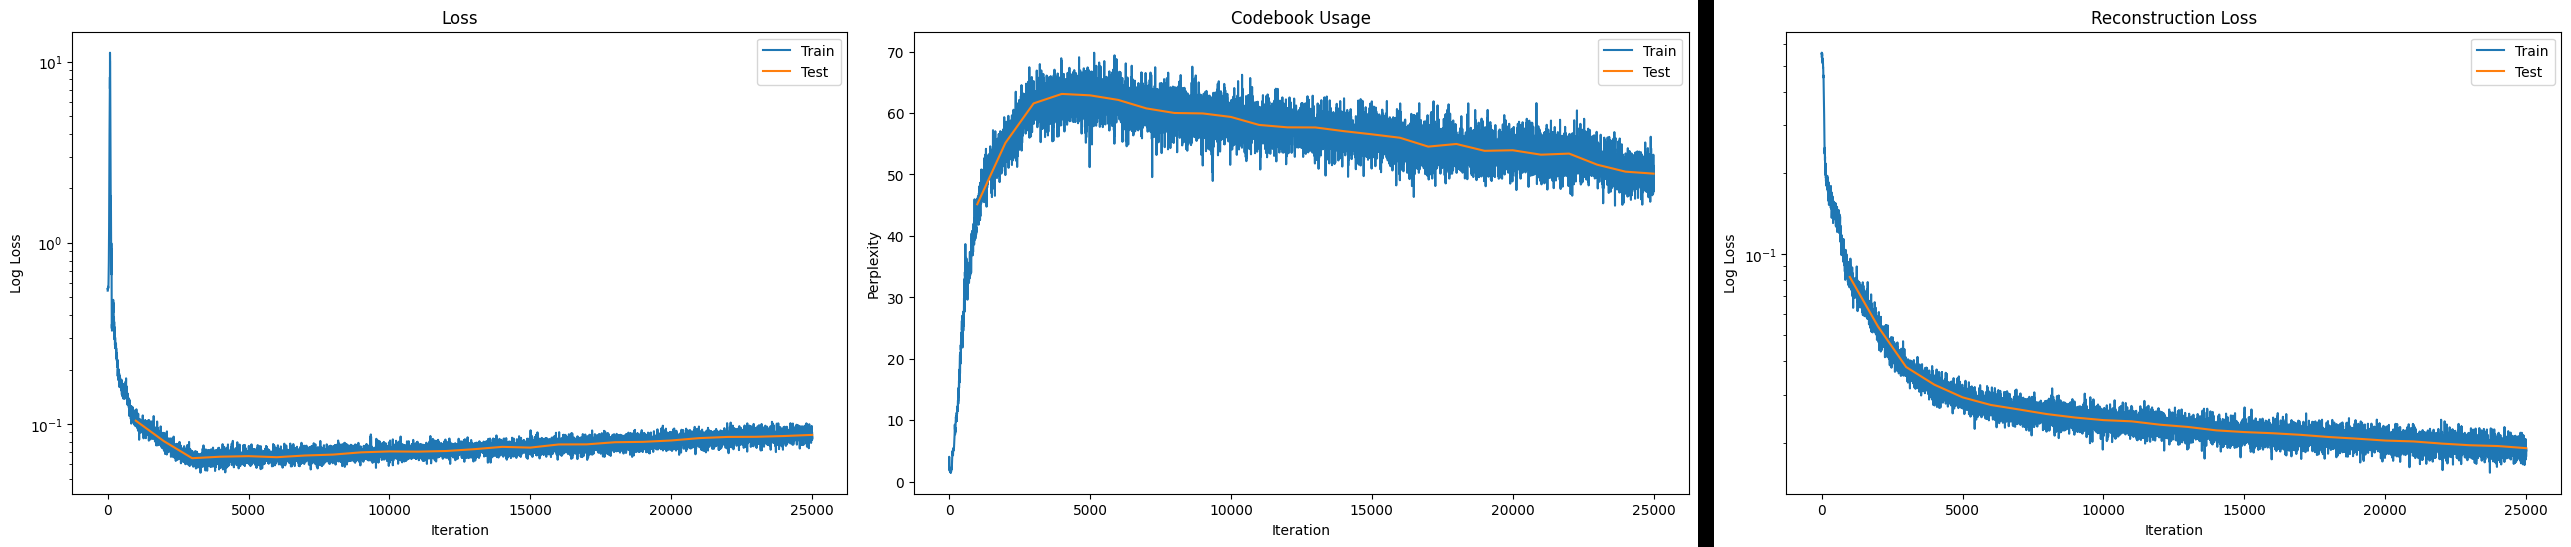

In [41]:
plt.ioff()
train_results.show_all_results()

# Reconstructions
Samples from the test set and their reconstructions

In [6]:
# load model
config_path = "../checkpoints/vqvae/config.json"
weights_path = "../checkpoints/vqvae/weights.pt"

model = load_vqvae(config_path, weights_path)
model.to(device)

VQVAE(
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (3): ReLU()
      (4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ResidualStack(
        (stack): Sequential(
          (0): ResidualBlock(
            (conv): Sequential(
              (0): ReLU()
              (1): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (2): ReLU()
              (3): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1))
            )
          )
          (1): ResidualBlock(
            (conv): Sequential(
              (0): ReLU()
              (1): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (2): ReLU()
              (3): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1))
            )
          )
        )
      )
    )
  )


In [7]:
# load dataset
_, test_set = make_datasets(seed=0, image_size=64)

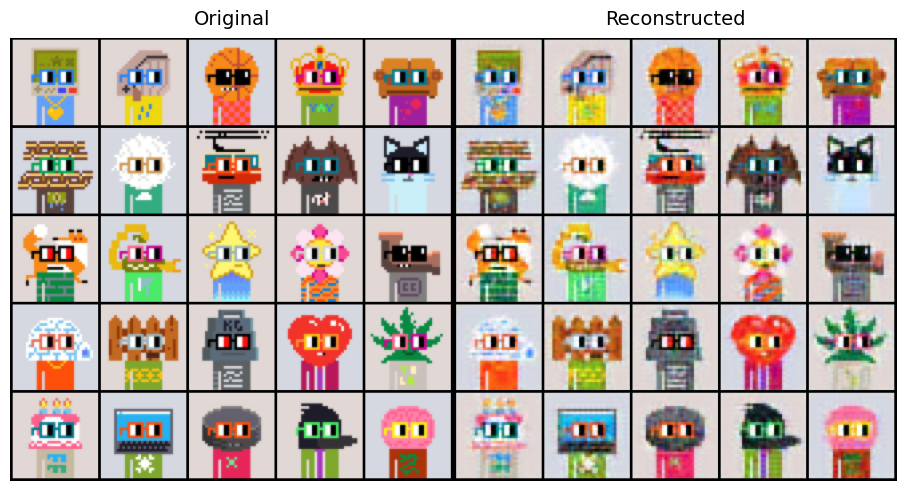

In [9]:
# sample images from dataset and view their reconstructions
indices = random.sample(range(len(test_set)), 25)
evaluate_vqvae_recon(test_set, indices, model);

# Interpolation
Interpolate the latents of 2 images and visualize their decoded result.

In [42]:
def random_interpolation():
    idx1, idx2 = random.sample(range(len(test_set)), 2)
    image1, image2 = test_set[idx1]["image"], test_set[idx2]["image"]

    # interpolate between two images
    return interpolate_images_vqvae(model, image1, image2, 10)

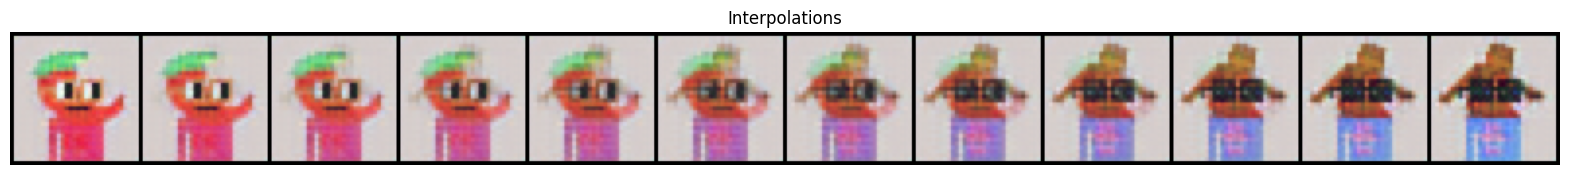

In [48]:
random_interpolation()

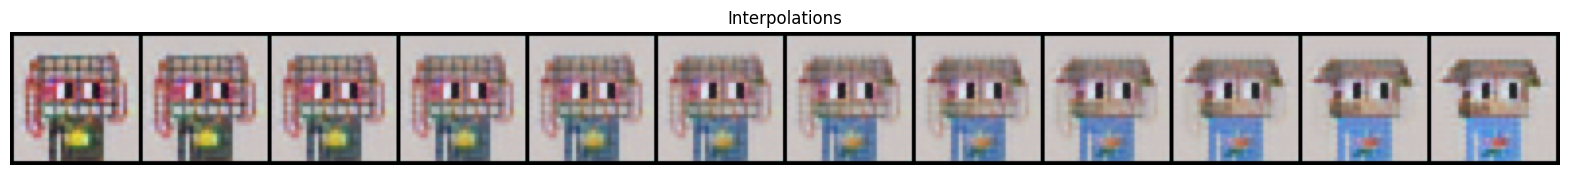

In [47]:
random_interpolation()

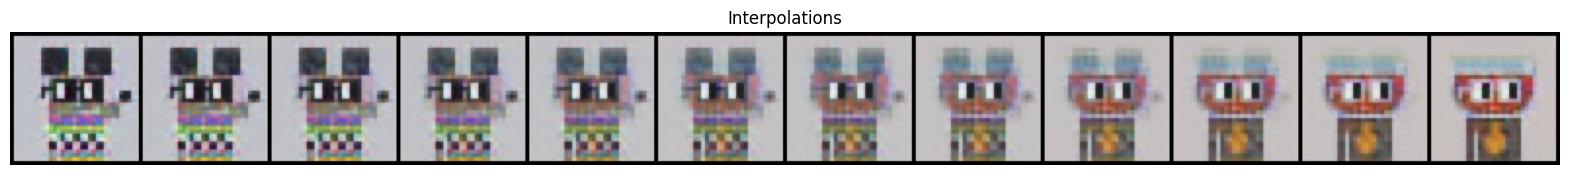

In [46]:
random_interpolation()